In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/yannismxflux/securite_alimentaire/main/export_alimconfiance.csv'
data = pd.read_csv(url, encoding = "utf-8",sep=';',dtype=object)

In [3]:
data.head()

APP_Libelle_etablissement           SIRET  \
0                NATURALIA FRANCE (NATURALIA FRANCE)  30247464800789   
1                           KERMOYAN (RESTAU RAPIDE)  30112032500024   
2                       NATURALIA (NATURALIA FRANCE)  30247464801894   
3  JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE)  30890741900011   
4                              INTERMARCHE (VIRODIS)  30668909200022   

                 Adresse_2_UA Code_postal    Libelle_commune  \
0       45 AV PIERRE LAROUSSE       92240           MALAKOFF   
1                      MARCHE       69500               BRON   
2  36 RUE EUGENE EICHENBERGER       92800            PUTEAUX   
3                   LE BREUIL       78460          CHEVREUSE   
4               38 AV LE FOLL       94290  VILLENEUVE LE ROI   

  Numero_inspection            Date_inspection  \
0          15914760  2021-03-03T01:00:00+01:00   
1          16252422  2021-11-26T01:00:00+01:00   
2          15903092  2021-02-22T01:00:00+01:00   
3          15901554  2021-02-19T01:00:00+01:00   
4          15968279  2021-04-14T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit Agrement  \
0              Alimentation générale        Satisfaisant      NaN   
1                         Restaurant   Très satisfaisant      NaN   
2              Alimentation générale   Très satisfaisant      NaN   
3                                  _        Satisfaisant      NaN   
4              Alimentation générale        Satisfaisant      NaN   

               geores                 filtre ods_type_activite  
0  48.822231,2.303769  Alimentation générale            Autres  
1  45.743534,4.922893             Restaurant            Autres  
2   48.881317,2.23746  Alimentation générale            Autres  
3  48.698235,2.027014                    NaN            Autres  
4  48.730573,2.426559  Alimentation générale            Autres

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Synthese_eval_sanit
- **lignes et colonnes** : (35558, 12)
- **types de variables** : qualitatives : 12, quantitatives : 0
- **Analyse des valeurs manquantes** :
   filtre 27.l5% Agrement  72.02%

#### Analyse de Fond :
- **Visualisation de la target** :
-**Satisfaisant**                     0.526239.  
-**Très satisfaisant**                0.422268.  
-**A améliorer**                      0.048203.  
-**A corriger de manière urgente**    0.003290.  
    
    
    
- **Signification des variables** :
    -  APP_Libelle_etablissement: Nom de l'Établissment              
    -  SIRET                    :             
    -  Adresse_2_UA                          
    -  Code_postal                           
    -  Libelle_commune                       
    -  Numero_inspection                     
    -  Date_inspection                       
    -  APP_Libelle_activite_etablissement    
    -  Synthese_eval_sanit                   
    -  Agrement                              
    -  geores                                
    -  filtre                                
    -  ods_type_activite 



- **Relation Variables / Target** :
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
    - target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
    - target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
    - blood_data / age : tres faible corrélation entre age et taux sanguins
    - viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
    - relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
    - relation hospitalisation / est malade : 
    - relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

### hypotheses nulle (H0): 

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

- Les individus atteints d'une quelconque maladie ont des taux significativement différents


    

### Analyse de la forme des données

In [4]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35558 entries, 0 to 35557
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   APP_Libelle_etablissement           35558 non-null  object
 1   SIRET                               35558 non-null  object
 2   Adresse_2_UA                        35109 non-null  object
 3   Code_postal                         35548 non-null  object
 4   Libelle_commune                     35558 non-null  object
 5   Numero_inspection                   35558 non-null  object
 6   Date_inspection                     35558 non-null  object
 7   APP_Libelle_activite_etablissement  35558 non-null  object
 8   Synthese_eval_sanit                 35558 non-null  object
 9   Agrement                            9946 non-null   object
 10  geores                              34964 non-null  object
 11  filtre                              25768 non-null  ob

In [5]:
df.shape

(35558, 13)

<AxesSubplot:ylabel='None'>

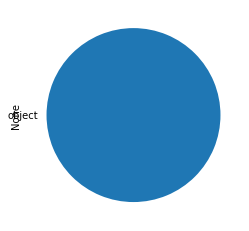

In [6]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

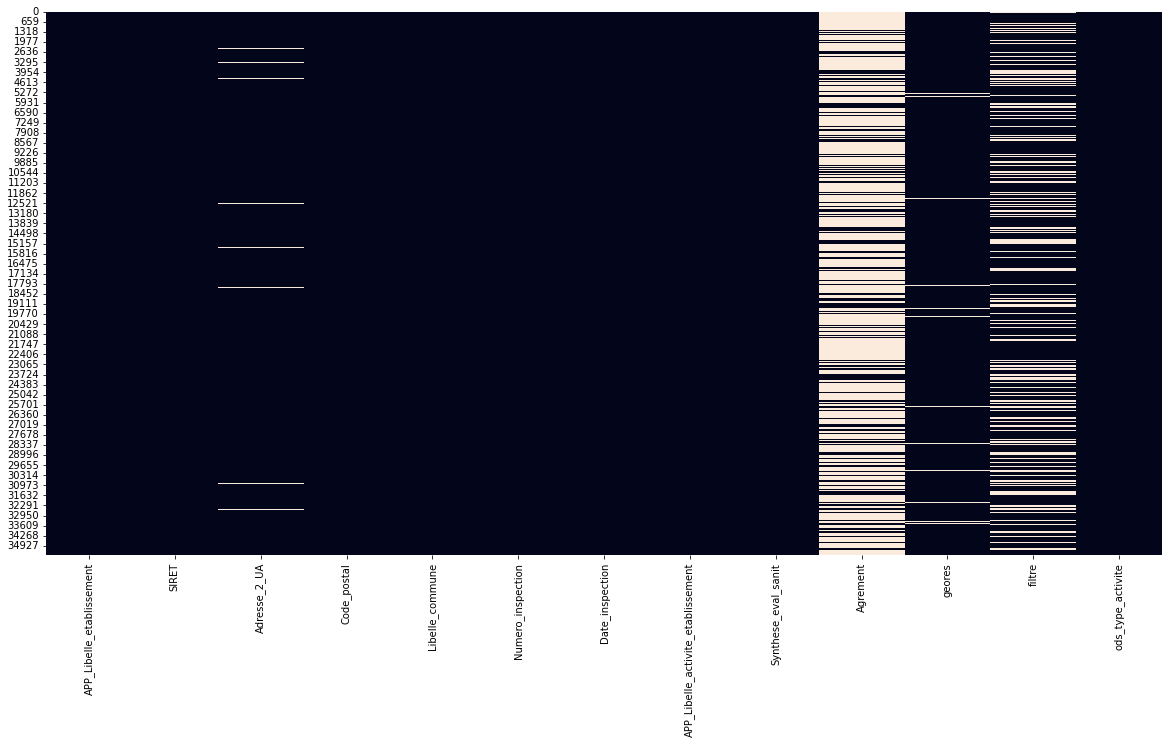

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

APP_Libelle_etablissement             0.000000
SIRET                                 0.000000
Libelle_commune                       0.000000
Numero_inspection                     0.000000
Date_inspection                       0.000000
APP_Libelle_activite_etablissement    0.000000
Synthese_eval_sanit                   0.000000
ods_type_activite                     0.000000
Code_postal                           0.000281
Adresse_2_UA                          0.012627
geores                                0.016705
filtre                                0.275325
Agrement                              0.720288
dtype: float64

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [9]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
df.head()

APP_Libelle_etablissement           SIRET  \
0                NATURALIA FRANCE (NATURALIA FRANCE)  30247464800789   
1                           KERMOYAN (RESTAU RAPIDE)  30112032500024   
2                       NATURALIA (NATURALIA FRANCE)  30247464801894   
3  JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE)  30890741900011   
4                              INTERMARCHE (VIRODIS)  30668909200022   

                 Adresse_2_UA Code_postal    Libelle_commune  \
0       45 AV PIERRE LAROUSSE       92240           MALAKOFF   
1                      MARCHE       69500               BRON   
2  36 RUE EUGENE EICHENBERGER       92800            PUTEAUX   
3                   LE BREUIL       78460          CHEVREUSE   
4               38 AV LE FOLL       94290  VILLENEUVE LE ROI   

  Numero_inspection            Date_inspection  \
0          15914760  2021-03-03T01:00:00+01:00   
1          16252422  2021-11-26T01:00:00+01:00   
2          15903092  2021-02-22T01:00:00+01:00   
3          15901554  2021-02-19T01:00:00+01:00   
4          15968279  2021-04-14T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit Agrement  \
0              Alimentation générale        Satisfaisant      NaN   
1                         Restaurant   Très satisfaisant      NaN   
2              Alimentation générale   Très satisfaisant      NaN   
3                                  _        Satisfaisant      NaN   
4              Alimentation générale        Satisfaisant      NaN   

               geores                 filtre ods_type_activite  
0  48.822231,2.303769  Alimentation générale            Autres  
1  45.743534,4.922893             Restaurant            Autres  
2   48.881317,2.23746  Alimentation générale            Autres  
3  48.698235,2.027014                    NaN            Autres  
4  48.730573,2.426559  Alimentation générale            Autres

<AxesSubplot:>

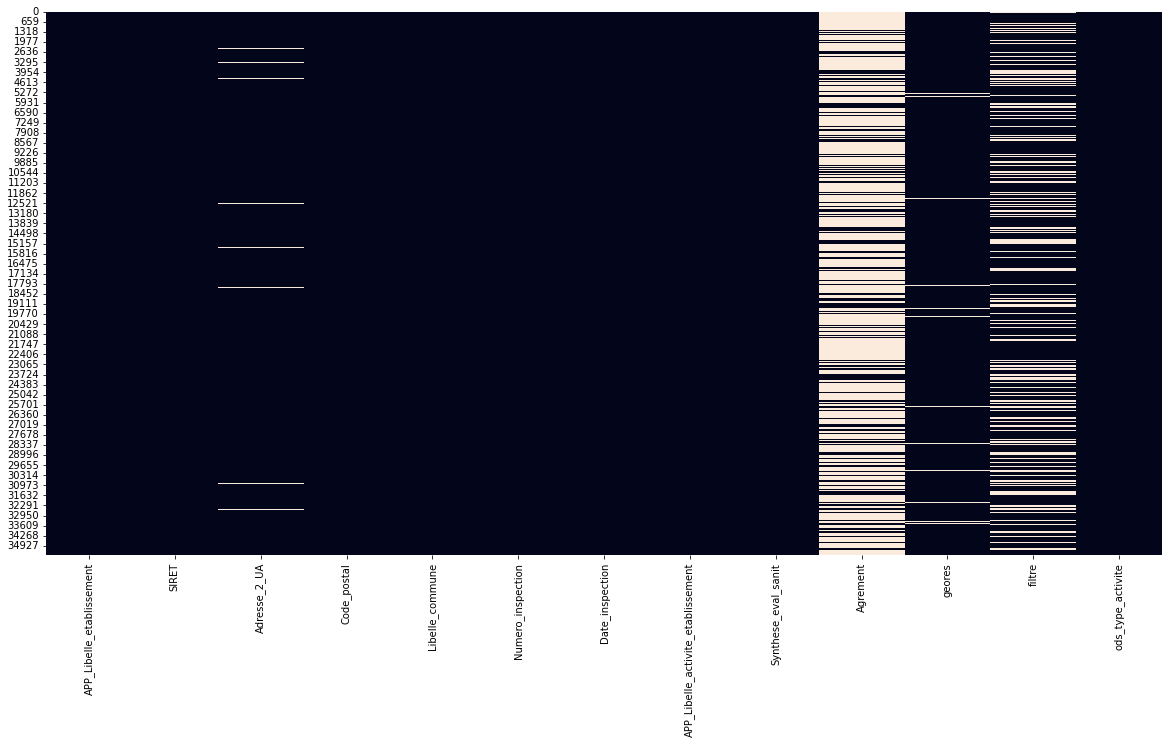

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## La colonne filtre :

Comme on peut le voir dans la premiere partie la colonne Filtre:  
 11  filtre                              25768 non-null  object
Appelé filtre 

In [11]:
df = df.drop('filtre', axis=1)
#df[df['filtre']!=df["APP_Libelle_activite_etablissement"]]

In [12]:
df.head()

APP_Libelle_etablissement           SIRET  \
0                NATURALIA FRANCE (NATURALIA FRANCE)  30247464800789   
1                           KERMOYAN (RESTAU RAPIDE)  30112032500024   
2                       NATURALIA (NATURALIA FRANCE)  30247464801894   
3  JARDINERIE DE CHEVREUSE (JARDINERIE DE CHEVREUSE)  30890741900011   
4                              INTERMARCHE (VIRODIS)  30668909200022   

                 Adresse_2_UA Code_postal    Libelle_commune  \
0       45 AV PIERRE LAROUSSE       92240           MALAKOFF   
1                      MARCHE       69500               BRON   
2  36 RUE EUGENE EICHENBERGER       92800            PUTEAUX   
3                   LE BREUIL       78460          CHEVREUSE   
4               38 AV LE FOLL       94290  VILLENEUVE LE ROI   

  Numero_inspection            Date_inspection  \
0          15914760  2021-03-03T01:00:00+01:00   
1          16252422  2021-11-26T01:00:00+01:00   
2          15903092  2021-02-22T01:00:00+01:00   
3          15901554  2021-02-19T01:00:00+01:00   
4          15968279  2021-04-14T02:00:00+02:00   

  APP_Libelle_activite_etablissement Synthese_eval_sanit Agrement  \
0              Alimentation générale        Satisfaisant      NaN   
1                         Restaurant   Très satisfaisant      NaN   
2              Alimentation générale   Très satisfaisant      NaN   
3                                  _        Satisfaisant      NaN   
4              Alimentation générale        Satisfaisant      NaN   

               geores ods_type_activite  
0  48.822231,2.303769            Autres  
1  45.743534,4.922893            Autres  
2   48.881317,2.23746            Autres  
3  48.698235,2.027014            Autres  
4  48.730573,2.426559            Autres

### Examen de la colonne target

In [13]:
df['Synthese_eval_sanit'].value_counts(normalize=True)

Satisfaisant                     0.526239
Très satisfaisant                0.422268
A améliorer                      0.048203
A corriger de manière urgente    0.003290
Name: Synthese_eval_sanit, dtype: float64

In [14]:
df[df["Synthese_eval_sanit"]=='A corriger de manière urgente'].describe()

APP_Libelle_etablissement           SIRET         Adresse_2_UA  \
count                        117             117                  116   
unique                       114             114                  113   
top               ZIMPFER JULIEN  45382473200029  FERME DU LANDGRABEN   
freq                           4               4                    4   

       Code_postal Libelle_commune Numero_inspection  \
count          117             117               117   
unique          99              99               117   
top          67240     Bischwiller       21-082704-1   
freq             4               4                 1   

                  Date_inspection APP_Libelle_activite_etablissement  \
count                         117                                117   
unique                         87                                 17   
top     2021-04-15T02:00:00+02:00                         Restaurant   
freq                            4                                 56   

                  Synthese_eval_sanit  Agrement              geores  \
count                             117        14                 117   
unique                              1        14                 113   
top     A corriger de manière urgente  34157608  48.744134,7.886703   
freq                              117         1                   4   

       ods_type_activite  
count                117  
unique                 7  
top               Autres  
freq                 100

In [38]:
list_of_activite = list(df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].index)

In [41]:
df[df['APP_Libelle_activite_etablissement'].isin(list_of_activite)]

APP_Libelle_etablissement           SIRET  \
6                    LECLERC (PLOUDAL DISTRIBUTION)  30959801900052   
45     MANGEONS FRAIS (LES HALLES BLACHERE BERNARD)  34029254901225   
51                                             LIDL  34326262221475   
128       PETIT CASINO (DISTRIBUTION CASINO FRANCE)  42826802333888   
238                                 MONSIEUR TY LAM  47801174500013   
...                                             ...             ...   
34869                                  PETIT CASINO  81256581000015   
34982                             MA FERME EN VILLE  80126411000033   
35023                             EURL ANDRE PASCAL  49216897600016   
35333                                         PEYNE  89332379000012   
35440                                      MONTABIO  81282691500033   

             Adresse_2_UA Code_postal          Libelle_commune  \
6                KERUSCAT       29830            PLOUDALMEZEAU   
45       7 BD DU HUIT MAI       71210                    TORCY   
51        RUE D AUSTRALIE       80000                   AMIENS   
128          14 PL CARNOT       69400   VILLEFRANCHE SUR SAONE   
238           3 AV JOFFRE       92380                  GARCHES   
...                   ...         ...                      ...   
34869       4 ROUTE NEUVE       48320                 Ispagnac   
34982     112 RUE DE SEZE       69006  Lyon 6e  Arrondissement   
35023  10, RUE DU PORTAIL       41300                    Orçay   
35333   6 PL SAINT BLAISE       23250                Pontarion   
35440   13, Rue Lou Marca       84660                   Maubec   

      Numero_inspection            Date_inspection  \
6              16265073  2021-12-06T01:00:00+01:00   
45             15972755  2021-04-15T02:00:00+02:00   
51             15930027  2021-03-15T01:00:00+01:00   
128            15898453  2021-02-17T01:00:00+01:00   
238            16221738  2021-10-28T02:00:00+02:00   
...                 ...                        ...   
34869       21-048219-1  2021-06-18T02:00:00+02:00   
34982       21-063921-1  2021-08-11T02:00:00+02:00   
35023       21-072947-1  2021-09-14T02:00:00+02:00   
35333       21-015998-1  2021-06-15T02:00:00+02:00   
35440       21-039150-1  2021-05-20T02:00:00+02:00   

                      APP_Libelle_activite_etablissement Synthese_eval_sanit  \
6                     Rayon pain-viennoiserie-pâtisserie   Très satisfaisant   
45                                               Primeur   Très satisfaisant   
51                                Rayon fruits & légumes   Très satisfaisant   
128                               Rayon fruits & légumes        Satisfaisant   
238                                              Primeur        Satisfaisant   
...                                                  ...                 ...   
34869  Libre service|Alimentation générale|Boulangeri...        Satisfaisant   
34982  Fromagerie|Libre service|Alimentation générale...        Satisfaisant   
35023                         Collecte de gibier sauvage   Très satisfaisant   
35333  Fromagerie|Libre service|Alimentation générale...   Très satisfaisant   
35440     Fromagerie|Libre service|Alimentation générale   Très satisfaisant   

      Agrement              geores ods_type_activite  
6          NaN  48.540309,-4.66693            Autres  
45         NaN  46.781683,4.438622            Autres  
51         NaN  49.903936,2.275338            Autres  
128        NaN   45.98563,4.717885            Autres  
238        NaN  48.838817,2.186315            Autres  
...        ...                 ...               ...  
34869      NaN  44.371029,3.534767            Autres  
34982      NaN  45.768893,4.854972            Autres  
35023      NaN  47.288818,2.111666         Abattoirs  
35333      NaN  45.997246,1.850505            Autres  
35440      NaN  43.868128,5.144308            Autres  

[275 rows x 12 columns]

In [36]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10]

Alimentation générale|Traiteur                                                   10
Fromagerie|Libre service|Alimentation générale                                    9
Collecte de gibier sauvage                                                        9
Découpe de gros gibier d'élevage                                                  9
Production de collagène, de gélatine ou de PHR                                    8
                                                                                 ..
Rayon traiteur|Rayon pain/viennoiserie/pâtisserie                                 1
Libre service|Alimentation générale|Rayon traiteur                                1
Fromagerie|Boulangerie-Pâtisserie|Poissonnerie|Traiteur|Boucherie-Charcuterie     1
Boulangerie-Pâtisserie|Glacier                                                    1
Gestion administrative-Remise directe                                             1
Name: APP_Libelle_activite_etablissement, Length: 88, dtype: int64

In [37]:
df['APP_Libelle_activite_etablissement'].value_counts()[df['APP_Libelle_activite_etablissement'].value_counts()<= 10].sum()

275

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

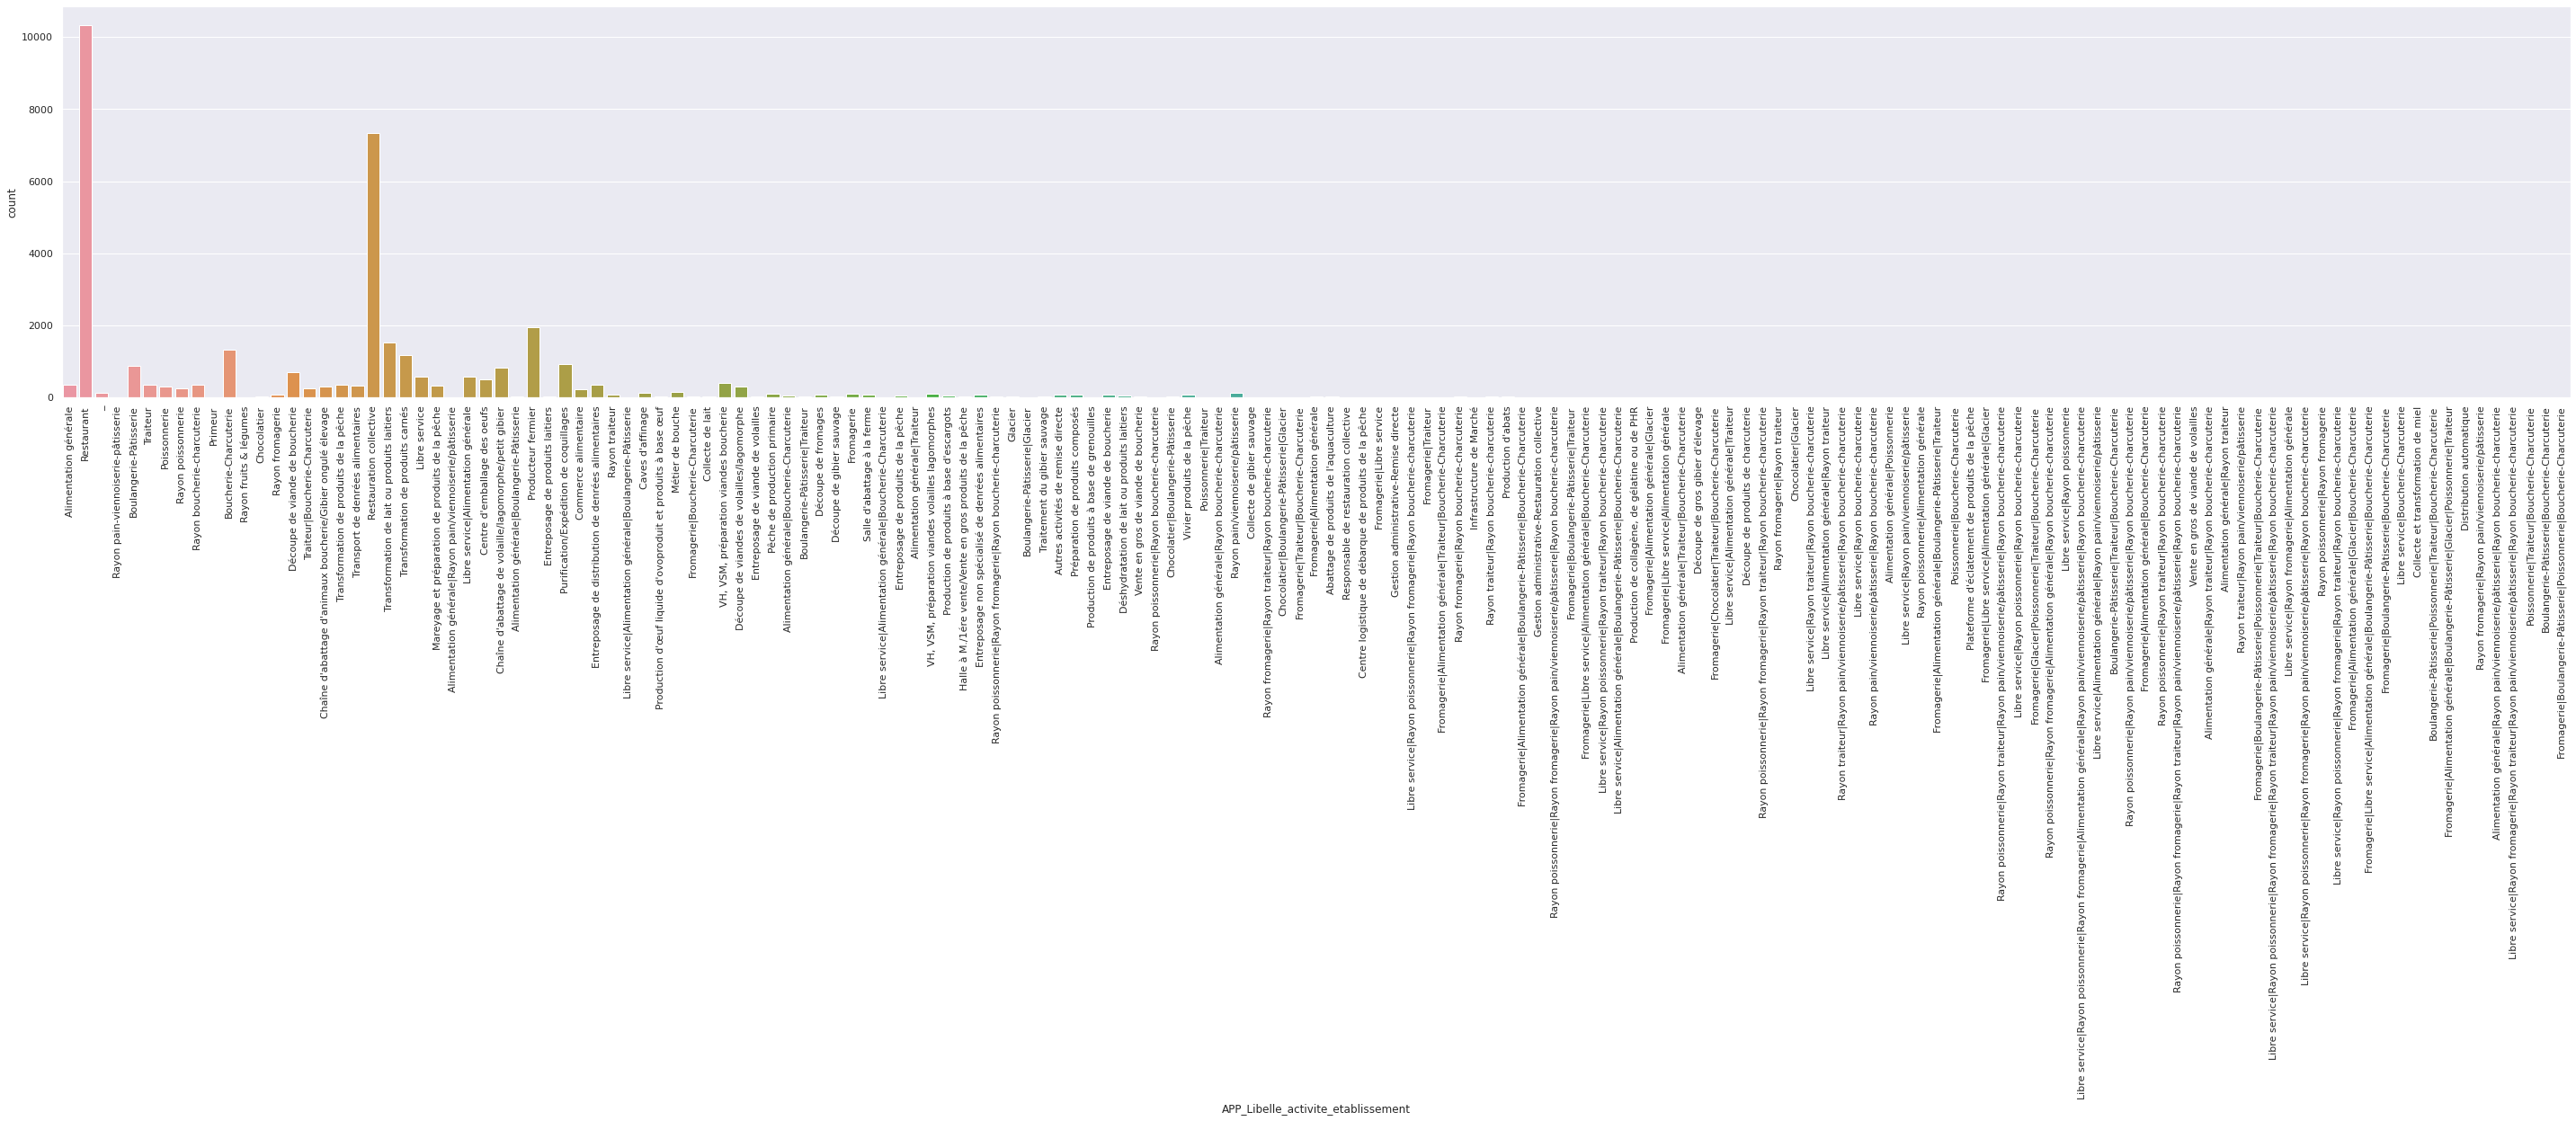

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement")

<AxesSubplot:xlabel='APP_Libelle_activite_etablissement', ylabel='count'>

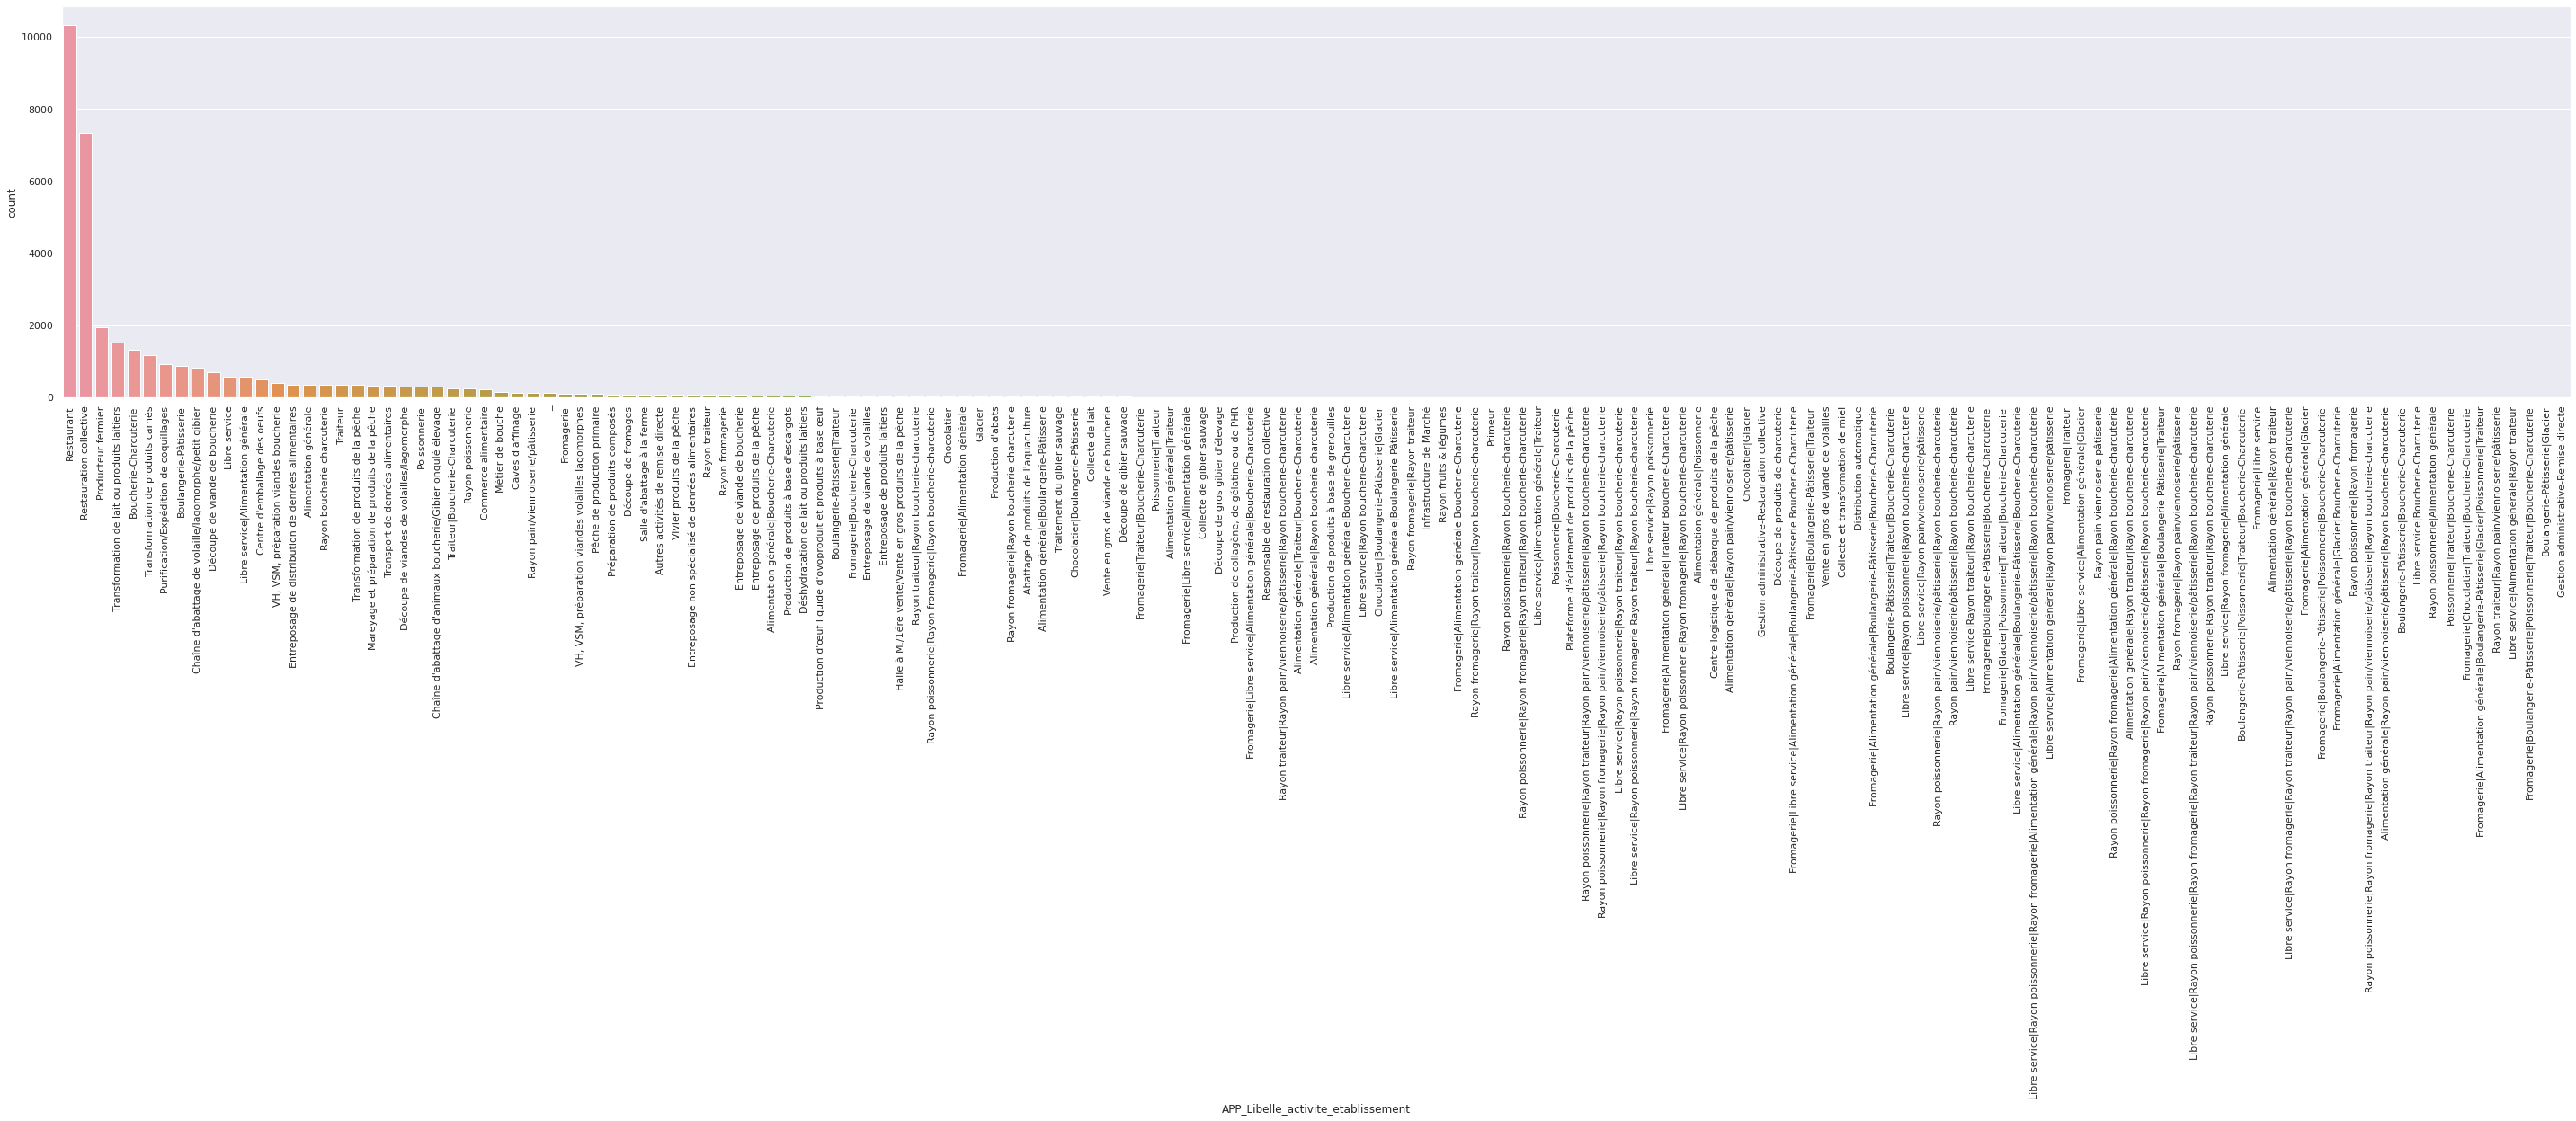

In [26]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(50,8))
plt.xticks(rotation='vertical')
sns.countplot(data=df,x="APP_Libelle_activite_etablissement", order = df['APP_Libelle_activite_etablissement'].value_counts().index)

### Variables Qualitatives

<AxesSubplot:xlabel='Synthese_eval_sanit', ylabel='count'>

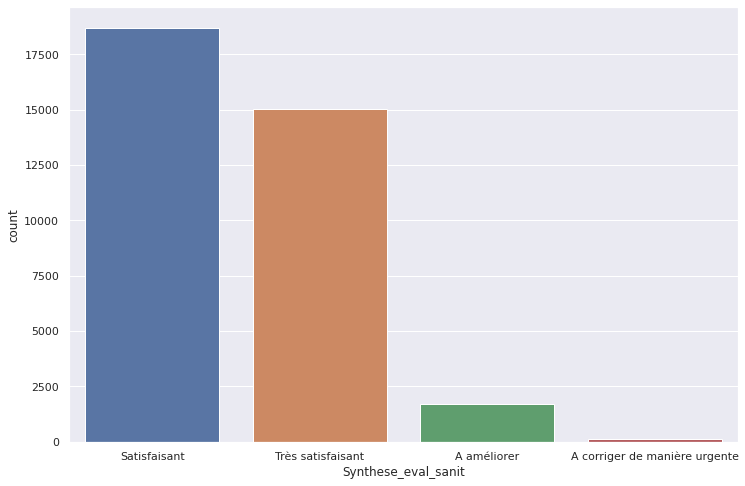

In [16]:
"""for col in df[["APP_Libelle_activite_etablissement","Synthese_eval_sanit"]]:
    plt.figure()
    df[col].value_counts().plot.pie()"""
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(data=df,x="Synthese_eval_sanit")

## Relation Target / Variables
### Création de sous-ensembles positifs et négatifs

In [17]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

KeyError: 'SARS-Cov-2 exam result'

### Création des ensembles Blood et viral

In [ ]:
missing_rate = df.isna().sum()/df.shape[0]

In [ ]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]

In [ ]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

## Target / Blood

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

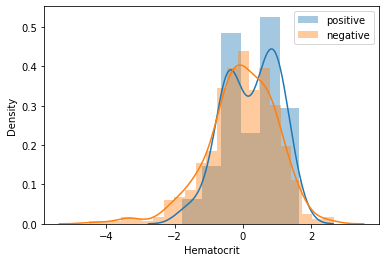

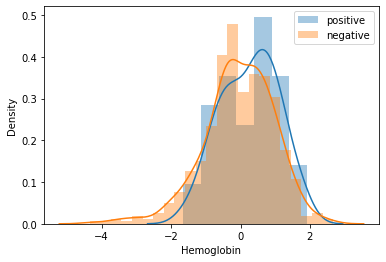

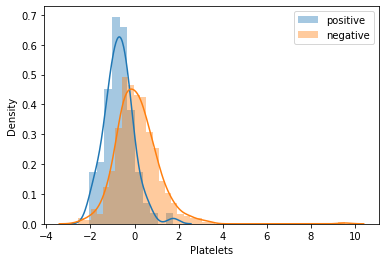

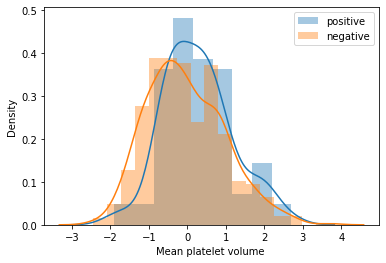

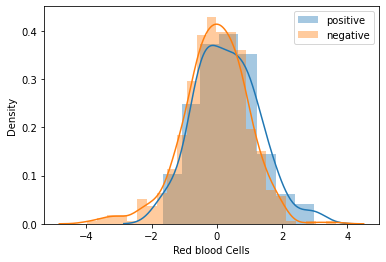

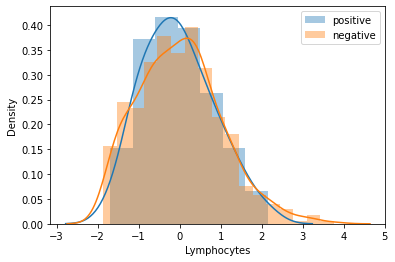

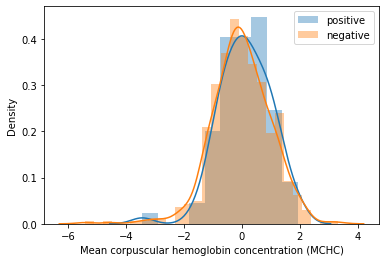

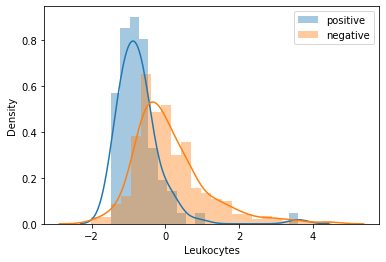

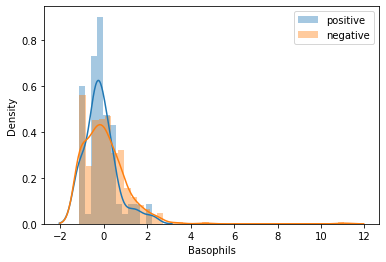

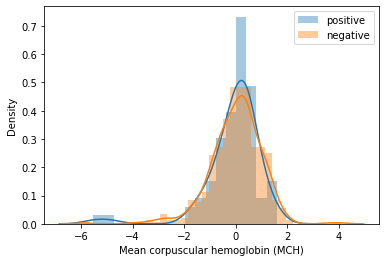

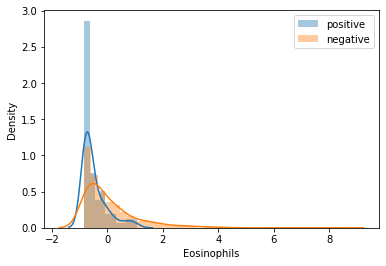

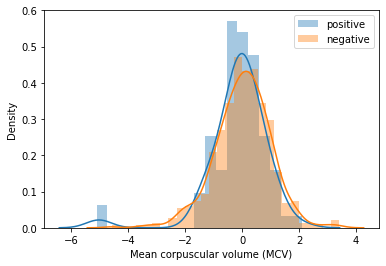

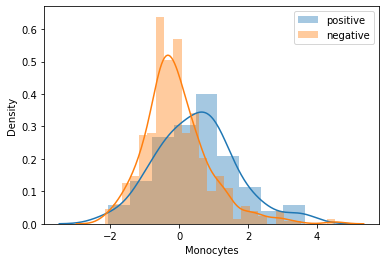

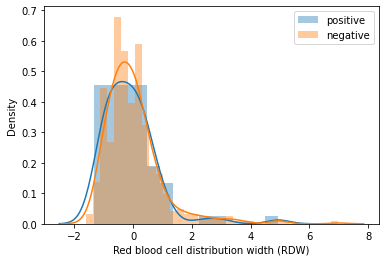

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

### Relation Target / age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

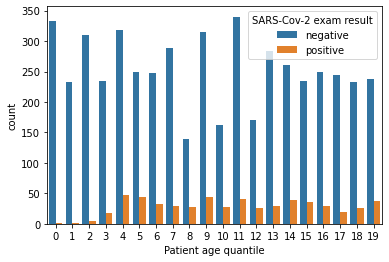

In [ ]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

### Relation Target / Viral

In [ ]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

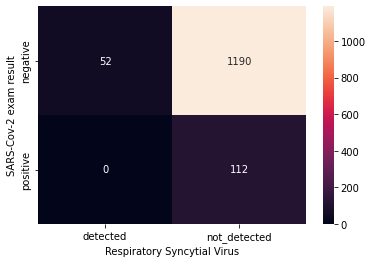

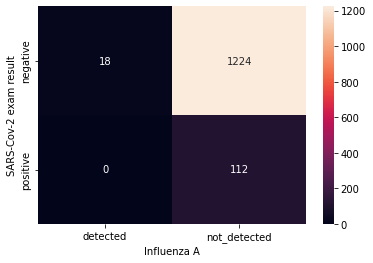

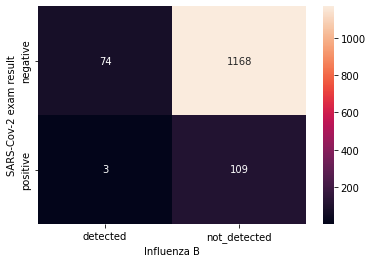

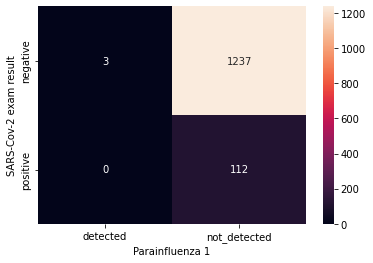

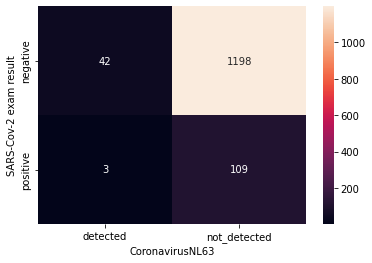

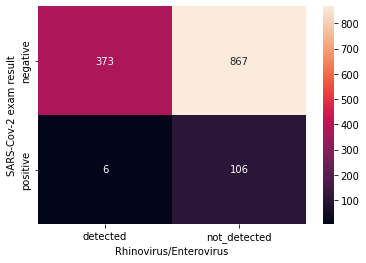

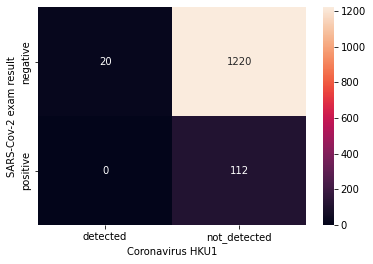

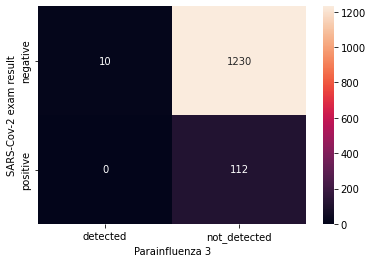

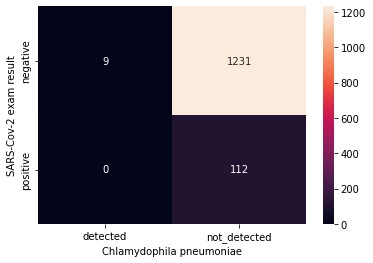

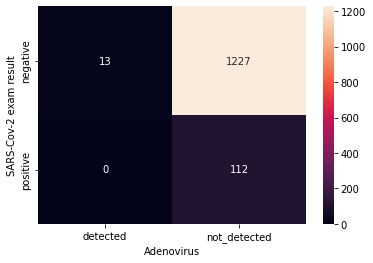

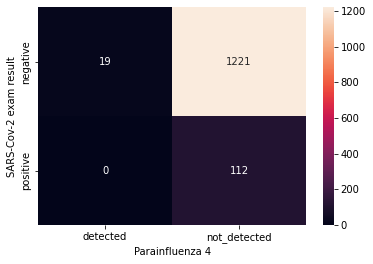

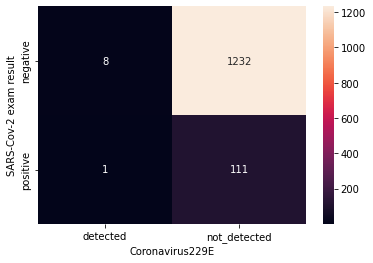

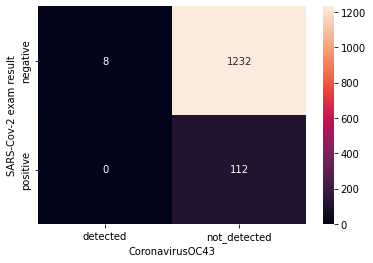

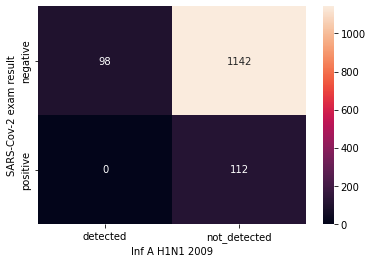

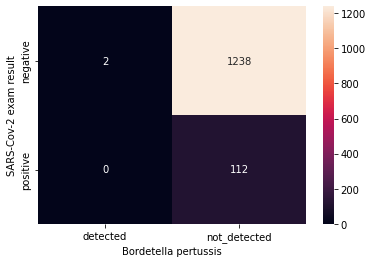

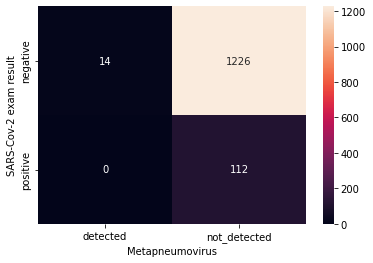

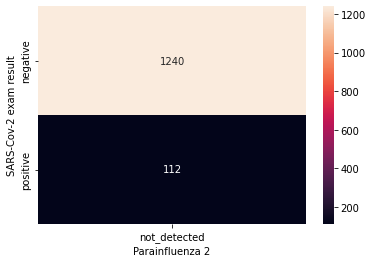

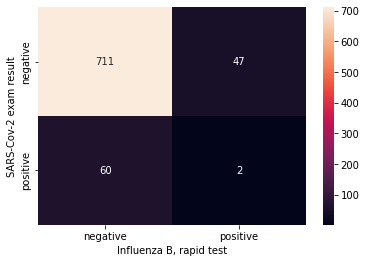

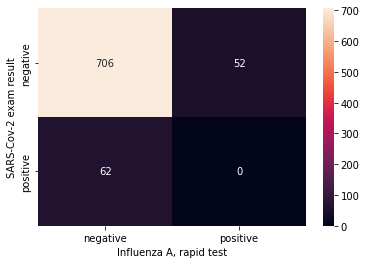

In [ ]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')

## Analyse un peu plus Avancée
### Relation Variables / Variables
### relations Taux Sanguin

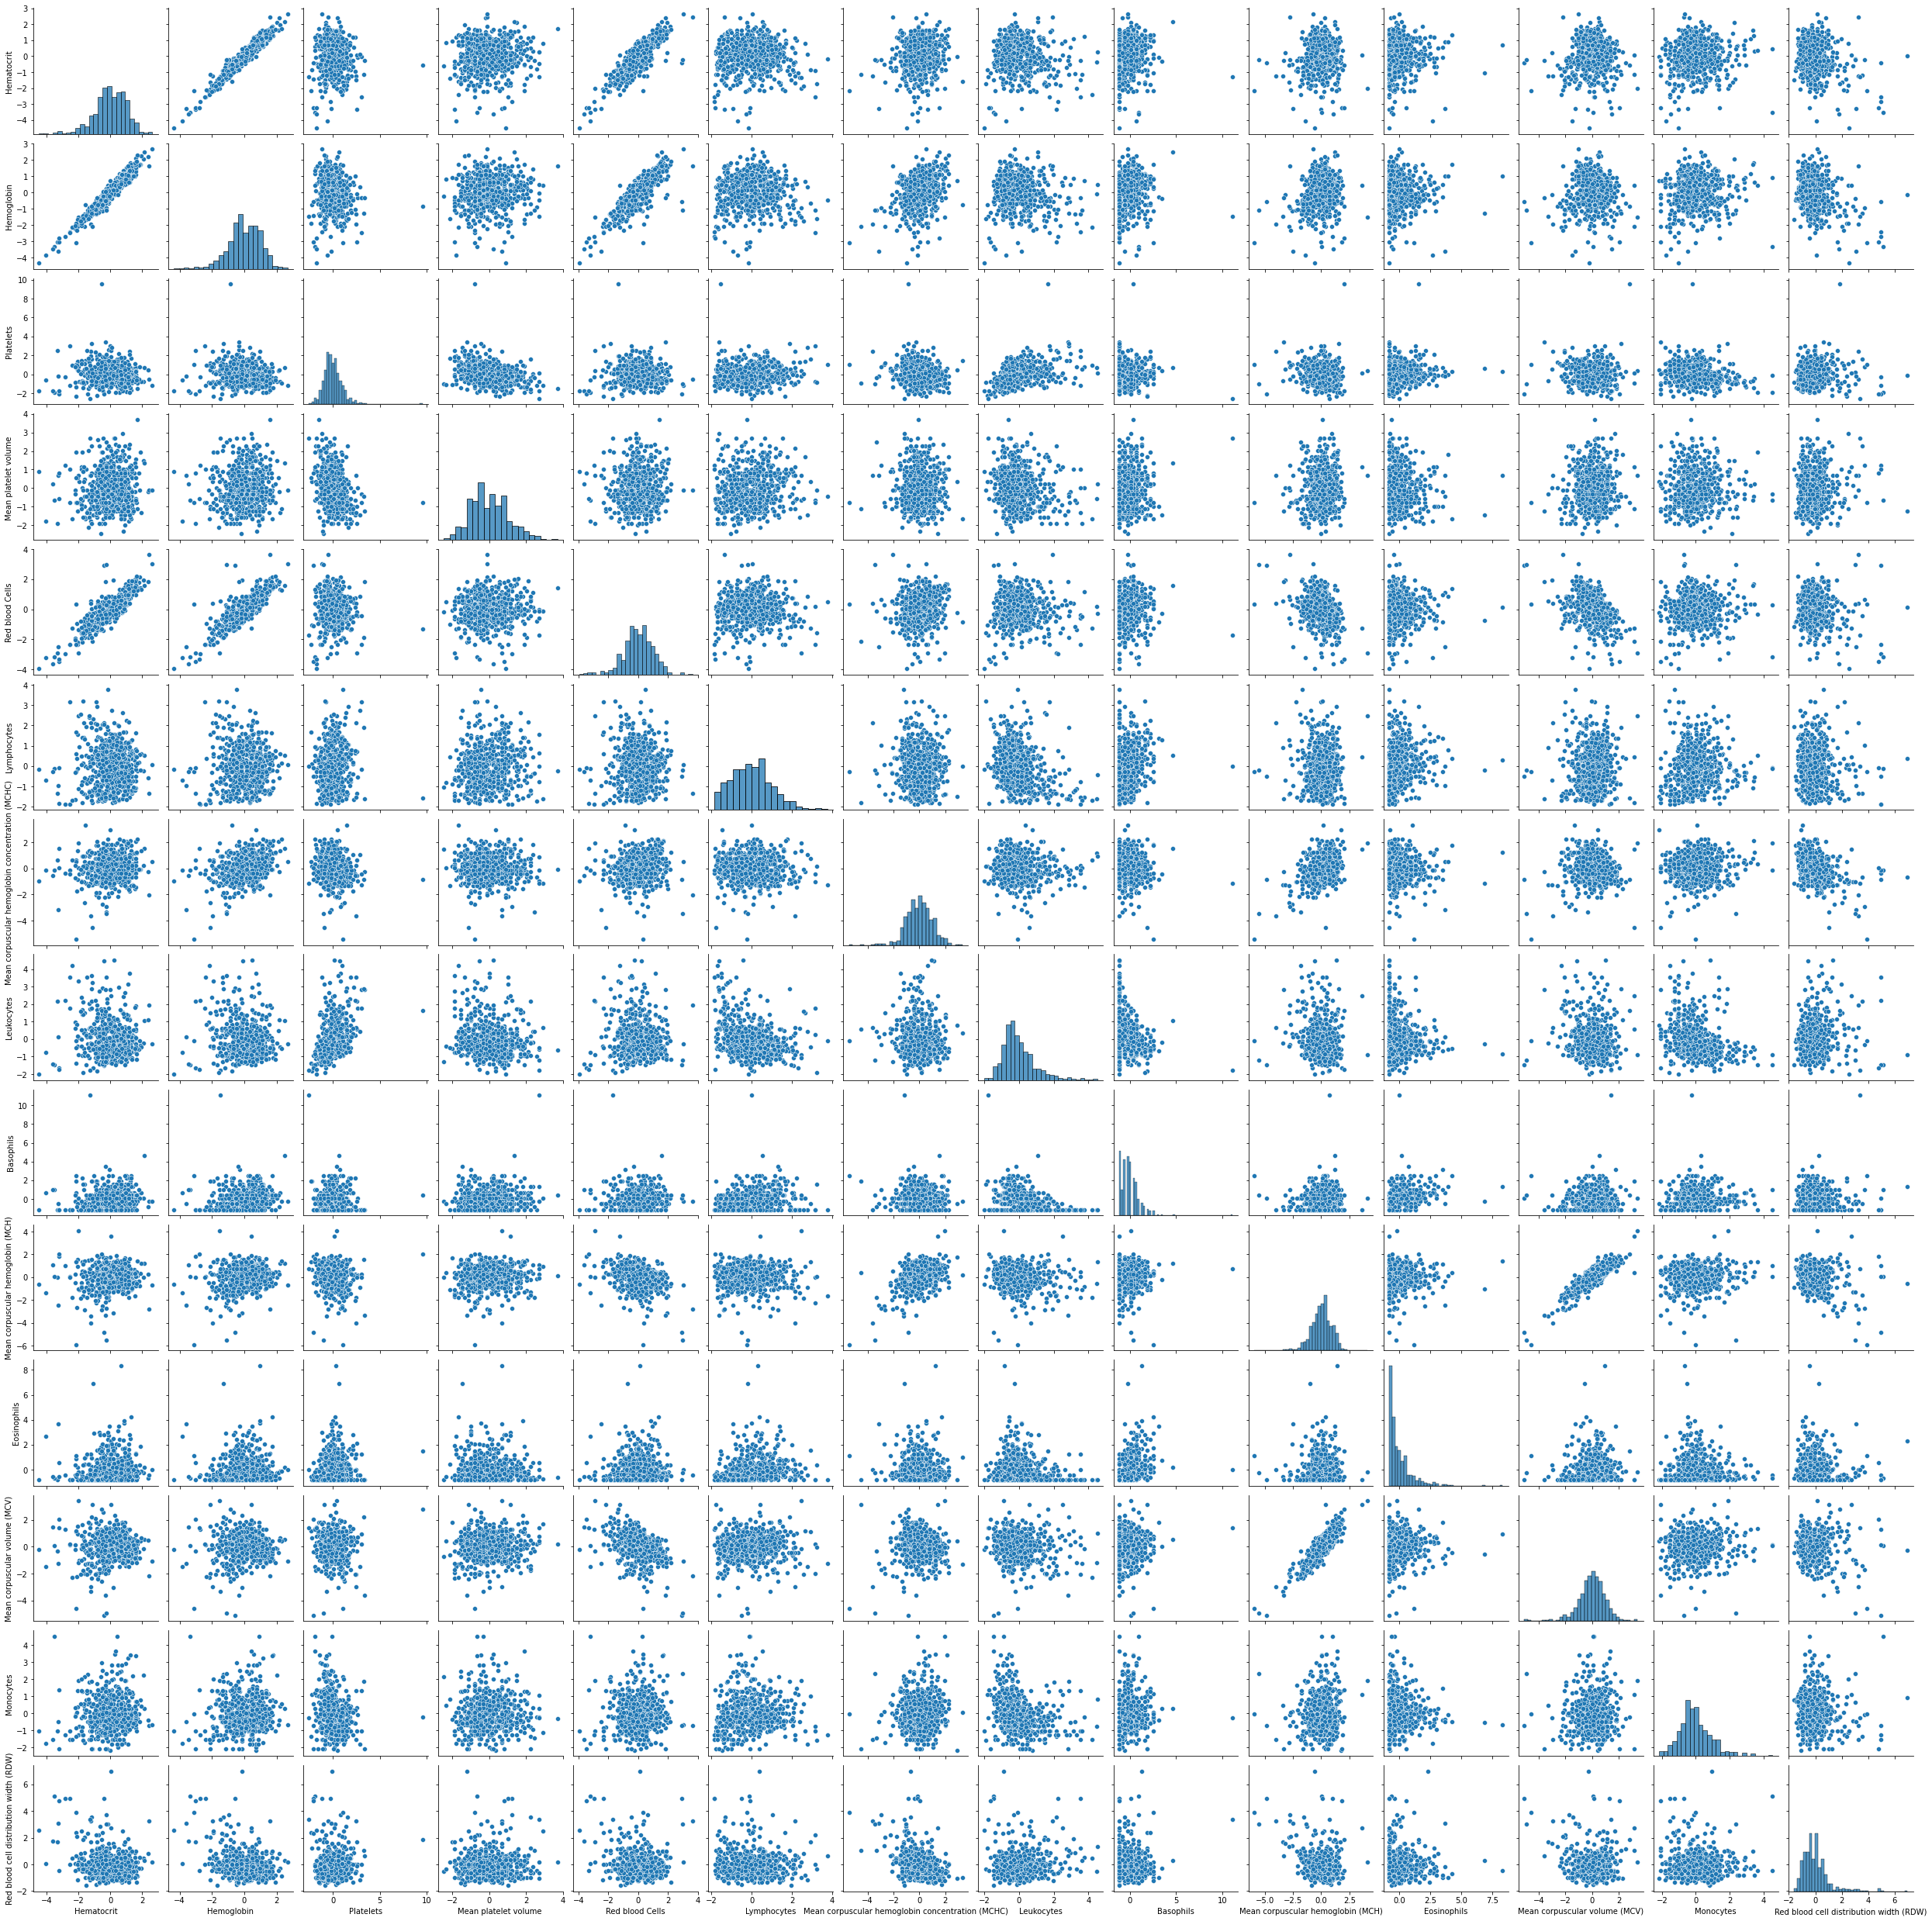

In [ ]:
sns.pairplot(df[blood_columns])

KeyboardInterrupt: 

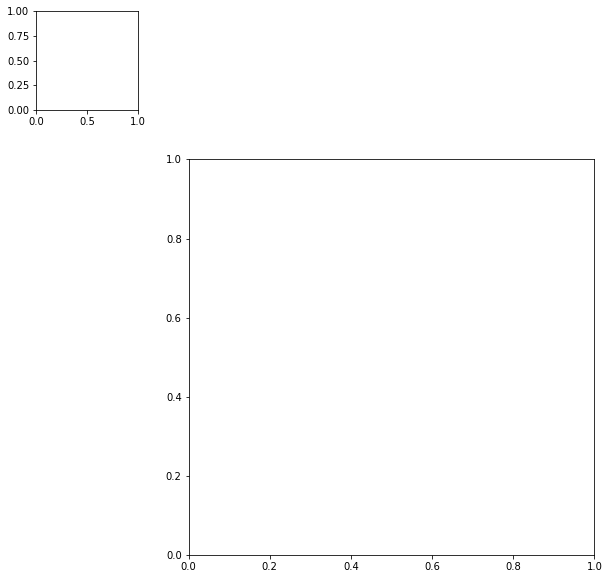

In [ ]:
sns.clustermap(df[blood_columns].corr())

## Relation Age / Sang

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

<Figure size 432x288 with 0 Axes>

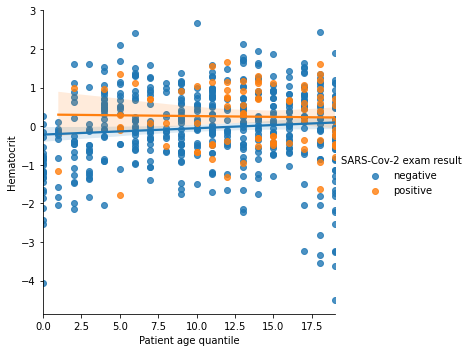

<Figure size 432x288 with 0 Axes>

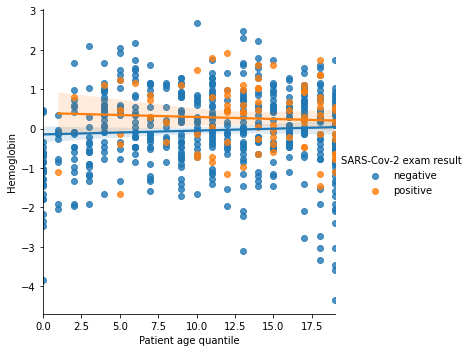

<Figure size 432x288 with 0 Axes>

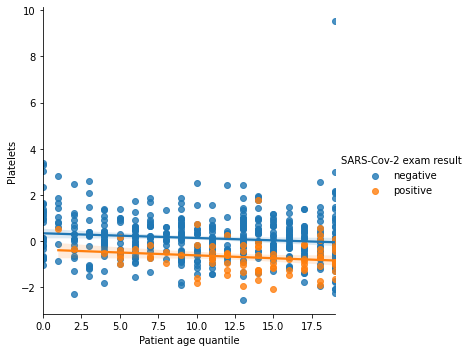

<Figure size 432x288 with 0 Axes>

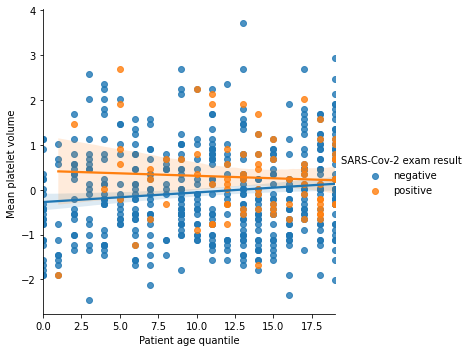

<Figure size 432x288 with 0 Axes>

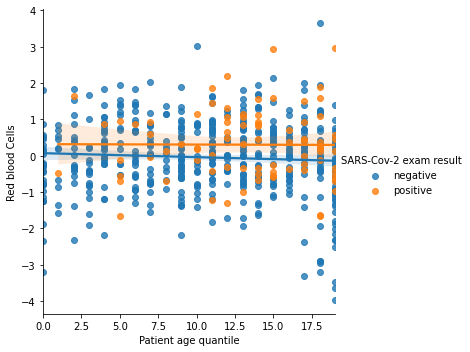

<Figure size 432x288 with 0 Axes>

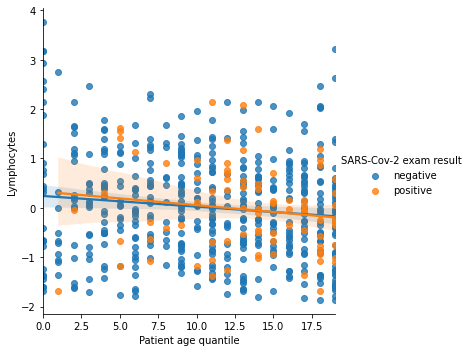

<Figure size 432x288 with 0 Axes>

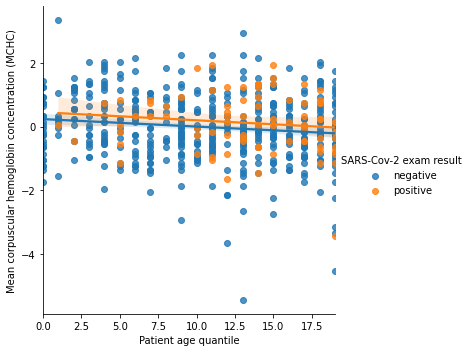

<Figure size 432x288 with 0 Axes>

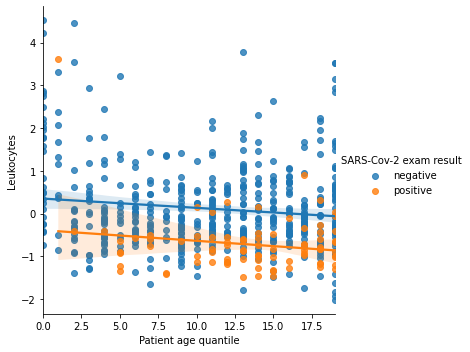

<Figure size 432x288 with 0 Axes>

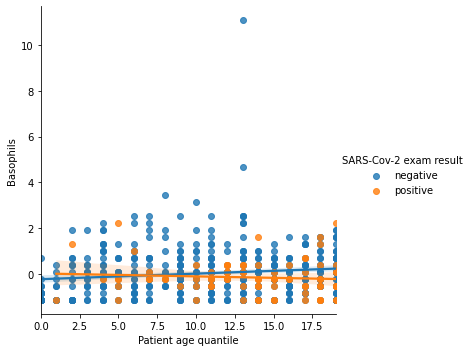

<Figure size 432x288 with 0 Axes>

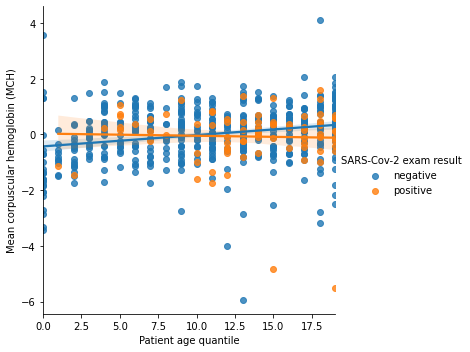

<Figure size 432x288 with 0 Axes>

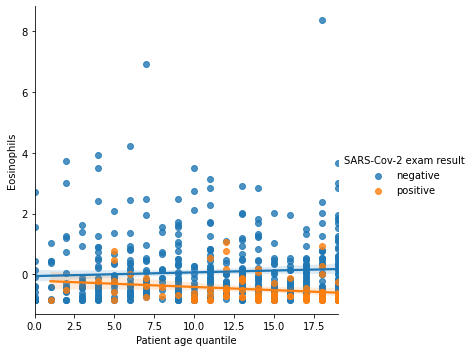

<Figure size 432x288 with 0 Axes>

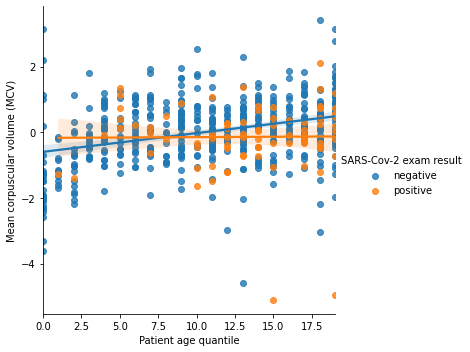

<Figure size 432x288 with 0 Axes>

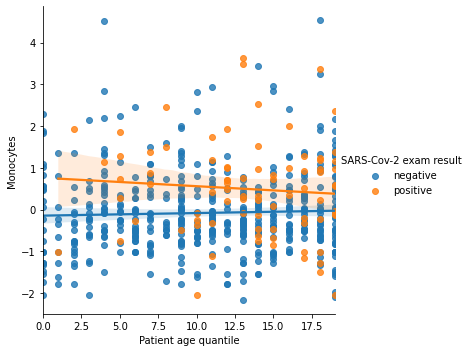

<Figure size 432x288 with 0 Axes>

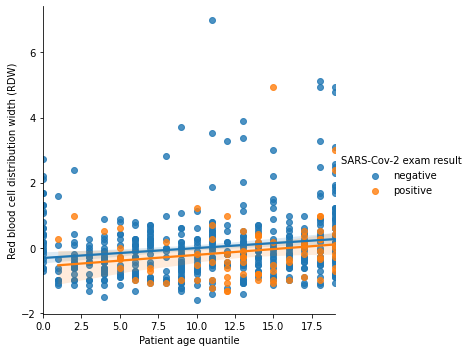

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [ ]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

### Relation entre Influenza et rapid test

In [ ]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [ ]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

### relation Viral / sanguin 
#### Création d'une nouvelle variable "est malade"

In [0]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >=1

In [ ]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


In [0]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

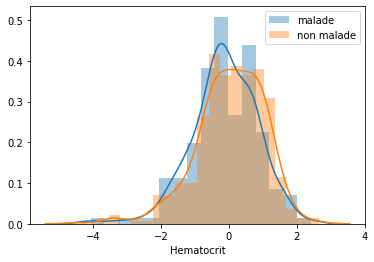

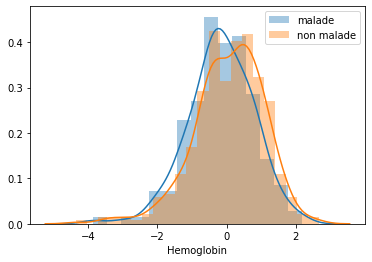

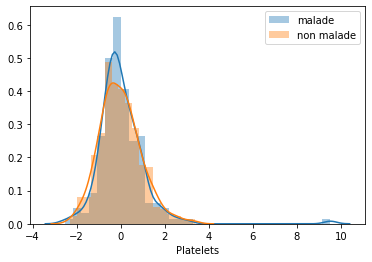

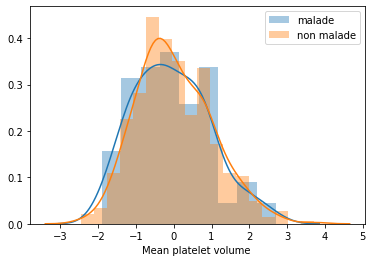

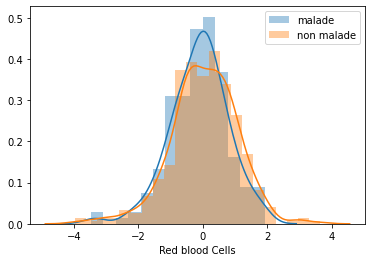

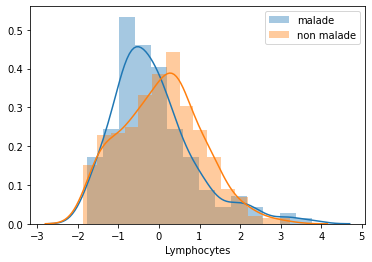

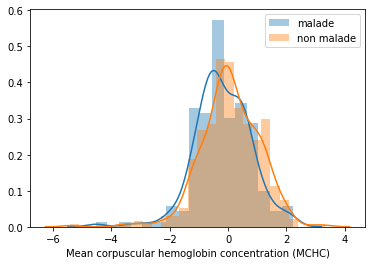

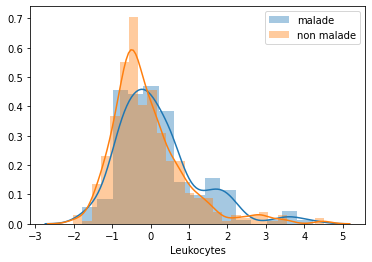

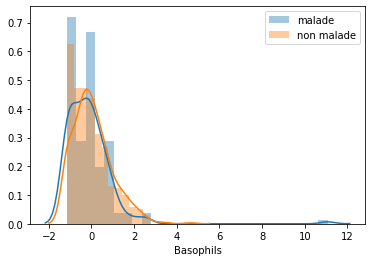

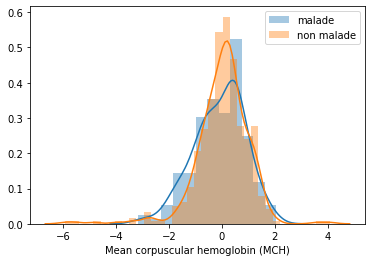

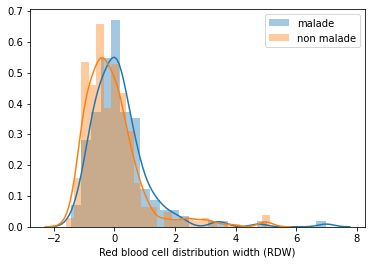

In [ ]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [0]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [0]:
df['statut'] = df.apply(hospitalisation, axis=1)

In [ ]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  Lymphocytes  \
Patient ID                                      
44477f75e8169d2              NaN          NaN   
126e9dd13932f68         0.102004     0.318366   
a46b4402a0e5696              NaN          NaN   
f7d619a94f97c45              NaN          NaN   
d9e41465789c2b5              NaN          NaN   

                 Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
Patient ID                                                                      
44477f75e8169d2                                               NaN         NaN   
126e9dd13932f68                                          -0.95079    -0.09461   
a46b4402a0e5696                                               NaN         NaN   
f7d619a94f97c45                                               NaN         NaN   
d9e41465789c2b5                                               NaN         NaN   

                 Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
Patient ID                                                                   
44477f75e8169d2        NaN                                NaN          NaN   
126e9dd13932f68  -0.223767                          -0.292269     1.482158   
a46b4402a0e5696        NaN                                NaN          NaN   
f7d619a94f97c45        NaN                                NaN          NaN   
d9e41465789c2b5        NaN                                NaN          NaN   

                 Mean corpuscular volume (MCV)  Monocytes  \


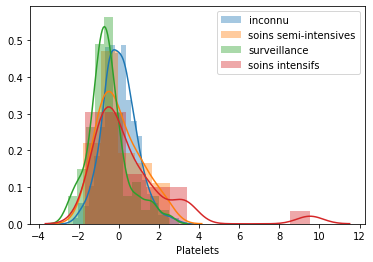

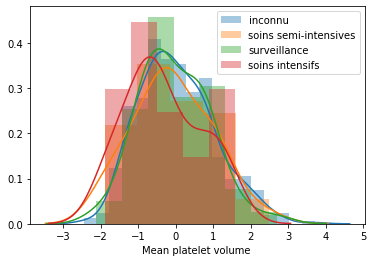

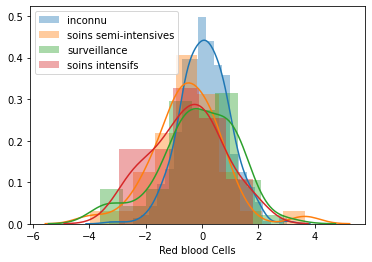

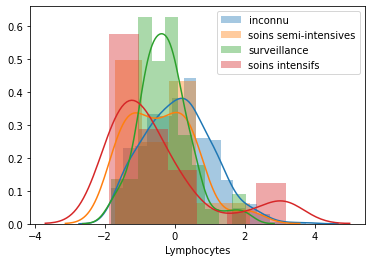

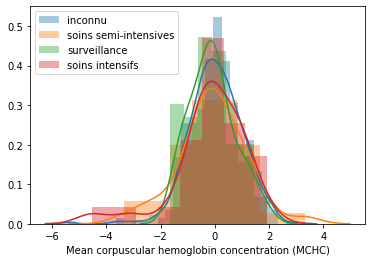

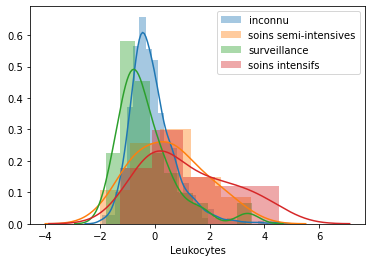

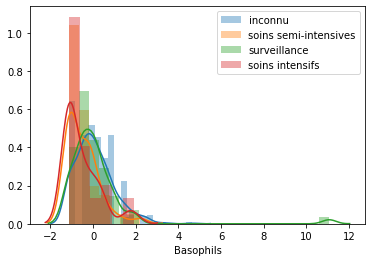

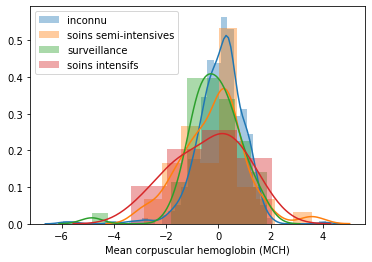

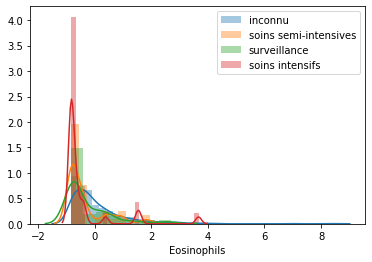

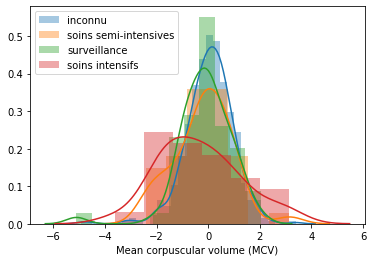

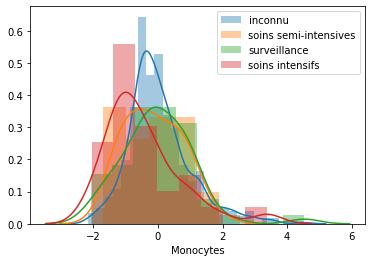

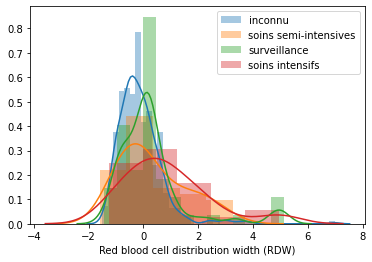

In [ ]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [ ]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [ ]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [ ]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [ ]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

## T-Test

In [0]:
from scipy.stats import ttest_ind

In [ ]:
positive_df

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
78511c183ae18bc                     7               positive   
d7834ed75f2da44                    16               positive   
b16b49f7bd3e692                    10               positive   
4382f5ea05e60c4                     2               positive   
d3729cd2658ca64                    15               positive   
...                               ...                    ...   
5c386388ba3c3f0                    16               positive   
9f8dfe2ae239238                     4               positive   
db77903261ab6d0                    15               positive   
ae66feb9e4dc3a0                     3               positive   
2697fdccbfeb7f7                    19               positive   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
78511c183ae18bc                                               0   
d7834ed75f2da44                                               1   
b16b49f7bd3e692                                               0   
4382f5ea05e60c4                                               0   
d3729cd2658ca64                                               0   
...                                                         ...   
5c386388ba3c3f0                                               0   
9f8dfe2ae239238                                               0   
db77903261ab6d0                                               0   
ae66feb9e4dc3a0                                               0   
2697fdccbfeb7f7                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
78511c183ae18bc                                                  0       
d7834ed75f2da44                                                  0       
b16b49f7bd3e692                                                  0       
4382f5ea05e60c4                                                  0       
d3729cd2658ca64                                                  0       
...                                                            ...       
5c386388ba3c3f0                                                  0       
9f8dfe2ae239238                                                  0       
db77903261ab6d0                                                  0       
ae66feb9e4dc3a0                                                  0       
2697fdccbfeb7f7                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
78511c183ae18bc                                                  0       
d7834ed75f2da44                                                  0       
b16b49f7bd3e692                                                  0       
4382f5ea05e60c4                                                  0       
d3729cd2658ca64                                                  0       
...                                                            ...       
5c386388ba3c3f0                                                  0       
9f8dfe2ae239238                                                  0       
db77903261ab6d0                                                  0       
ae66feb9e4dc3a0                                                  0       
2697fdccbfeb7f7                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
78511c183ae18bc         NaN         NaN        NaN                    NaN   
d7834ed75f2da44         NaN         NaN        NaN                    NaN   
b16b49f7bd3e692         NaN         NaN        NaN                    NaN   
4

In [0]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [0]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [ ]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- H0 Rejetée
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a1379aa-ea9c-402c-95ca-194460431a68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>